In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.1.0
sys.version_info(major=3, minor=7, micro=6, releaselevel='final', serial=0)
matplotlib 3.1.0
numpy 1.16.4
pandas 0.24.2
sklearn 0.21.3
tensorflow 2.1.0
tensorflow_core.python.keras.api._v2.keras 2.2.4-tf


In [2]:
# read data from file
df = pd.read_csv("./data/AdvectionDiffusion/noise_00.csv")
x = df[['x', 'y', 'z', 't']].values
y = df['u'].values
u_t = df['u_t'].values
u_x = df['u_x'].values
u_y = df['u_y'].values
u_z = df['u_z'].values
u_xx = df['u_xx'].values
u_yy = df['u_yy'].values
u_zz = df['u_zz'].values

from sklearn.model_selection import train_test_split
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, random_state=7)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, random_state=11)

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(2812, 4) (2812,)
(938, 4) (938,)
(1250, 4) (1250,)


In [3]:
def build_model(hidden_layers = 1, layer_size = 30, learning_rate = 3e-5):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(layer_size, activation="sigmoid",
                                input_shape=x_train.shape[1:]))
    for _ in range(hidden_layers - 1):
        model.add(keras.layers.Dense(layer_size,
                                    activation = "sigmoid"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate)
    model.compile(loss = 'mse', optimizer = optimizer)
    return model

callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-10)]

In [4]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 0.2)
    plt.show()

Train on 2812 samples, validate on 938 samples
Epoch 1/100
2812/2812 [==============================] - 0s 117us/sample - loss: 2.0890 - val_loss: 2.0123
Epoch 2/100
2812/2812 [==============================] - 0s 34us/sample - loss: 1.8910 - val_loss: 1.8229
Epoch 3/100
2812/2812 [==============================] - 0s 33us/sample - loss: 1.7127 - val_loss: 1.6522
Epoch 4/100
2812/2812 [==============================] - 0s 33us/sample - loss: 1.5520 - val_loss: 1.4982
Epoch 5/100
2812/2812 [==============================] - 0s 34us/sample - loss: 1.4072 - val_loss: 1.3594
Epoch 6/100
2812/2812 [==============================] - 0s 34us/sample - loss: 1.2765 - val_loss: 1.2340
Epoch 7/100
2812/2812 [==============================] - 0s 32us/sample - loss: 1.1587 - val_loss: 1.1209
Epoch 8/100
2812/2812 [==============================] - 0s 33us/sample - loss: 1.0524 - val_loss: 1.0188
Epoch 9/100
2812/2812 [==============================] - 0s 33us/sample - loss: 0.9565 - val_loss: 0.926

2812/2812 [==============================] - 0s 36us/sample - loss: 0.0580 - val_loss: 0.0510
Epoch 78/100
2812/2812 [==============================] - 0s 34us/sample - loss: 0.0579 - val_loss: 0.0509
Epoch 79/100
2812/2812 [==============================] - 0s 34us/sample - loss: 0.0578 - val_loss: 0.0508
Epoch 80/100
2812/2812 [==============================] - 0s 34us/sample - loss: 0.0577 - val_loss: 0.0507
Epoch 81/100
2812/2812 [==============================] - 0s 34us/sample - loss: 0.0577 - val_loss: 0.0506
Epoch 82/100
2812/2812 [==============================] - 0s 35us/sample - loss: 0.0576 - val_loss: 0.0505
Epoch 83/100
2812/2812 [==============================] - 0s 36us/sample - loss: 0.0575 - val_loss: 0.0504
Epoch 84/100
2812/2812 [==============================] - 0s 34us/sample - loss: 0.0575 - val_loss: 0.0503
Epoch 85/100
2812/2812 [==============================] - 0s 34us/sample - loss: 0.0574 - val_loss: 0.0502
Epoch 86/100
2812/2812 [==========================

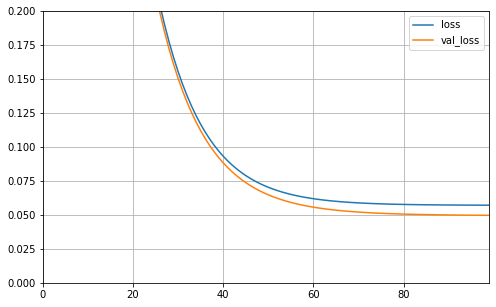

1250/1250 [==============================] - 0s 19us/sample - loss: 0.0574


0.057371200144290924

In [16]:
model = build_model(hidden_layers = 4)
history = model.fit(x_train, y_train, epochs = 100,
                    validation_data = (x_valid, y_valid),
                    callbacks = callbacks)
print(model.summary())
plot_learning_curves(history)
model.evaluate(x_test, y_test)

In [17]:
from tensorflow import float64
# get weights and bias in each layer
i = 0
kernel_tensor = []
bias_tensor = []
# kernel_tensor = []
for each in model.weights:
    if i % 2 is 0:
        print('kernel_{}: '.format(i // 2))
#         kernel_tensor.append(each)
        kernel_tensor.append(tf.constant(each.numpy(), dtype=float64))
    else:
        print('bias_{}: '.format(i // 2))
        bias_tensor.append(tf.constant(each.numpy(), dtype=float64))
    print(tf.constant(each.numpy()))
    i += 1

kernel_0: 
tf.Tensor(
[[-0.3896283  -0.1919173   0.11975003  0.33775488 -0.25897133  0.02247434
  -0.25494018 -0.12793456 -0.33550793  0.36422127  0.13603002 -0.06560457
   0.18863414  0.08322331  0.07831157  0.22057983 -0.34430382 -0.23547195
   0.1858292   0.3180242   0.32733822 -0.22860757 -0.2104083   0.33688134
  -0.40798953 -0.05425822 -0.37889844 -0.31193832 -0.05535797 -0.29298887]
 [ 0.03218555 -0.02627187 -0.39486176  0.3701851  -0.02916453  0.11088116
   0.24305058 -0.35275963  0.20648915  0.3606219   0.05372606  0.06319295
   0.34773362  0.01173787  0.22592972  0.00374222  0.25368974 -0.10723483
   0.36436144 -0.23198144 -0.15839075 -0.22965649 -0.15110138 -0.19647554
   0.2570898  -0.088638   -0.38663813 -0.1976145   0.20483658  0.26861373]
 [-0.35987043  0.26245797  0.00125503  0.2739544  -0.286906    0.07951792
   0.06983209  0.22195746  0.09156707 -0.39696965  0.30837744 -0.25959903
   0.35467458  0.29224277 -0.17912458  0.2977149  -0.21672615  0.2841367
  -0.18640628  

In [35]:
# reconstruct the machine learning model
def s(input_x, input_y, input_z, input_t):
    i = 0
    for w, b in zip(kernel_tensor, bias_tensor):
        if i == 0:
            input_tensor = input_x*w[0,:] + input_y*w[1,:] + input_z*w[2,:] + input_t*w[3,:] + b
            input_tensor = tf.nn.sigmoid(input_tensor)
        elif i < len(kernel_tensor)-1:
            output_tensor = input_tensor@w + b
            output = tf.nn.sigmoid(output_tensor)
            input_tensor = output
        else:
            output_tensor = input_tensor@w + b
            output = output_tensor
        i += 1
    return output

In [36]:
input_array = x
input_x = tf.Variable(input_array[:, 0].reshape(5000, 1))
input_y = tf.Variable(input_array[:, 1].reshape(5000, 1))
input_z = tf.Variable(input_array[:, 2].reshape(5000, 1))
input_t = tf.Variable(input_array[:, 3].reshape(5000, 1))

print(s(input_x, input_y, input_z, input_t))

tf.Tensor(
[[ 0.          0.          0.         ...  0.         -0.
  -0.        ]
 [ 0.01612267  0.01190998  0.03407167 ...  0.00277982 -0.02492876
  -0.01915339]
 [ 0.03224534  0.02381997  0.06814335 ...  0.00555964 -0.04985753
  -0.03830677]
 ...
 [ 0.11285868  0.08336988  0.23850172 ...  0.01945873 -0.17450135
  -0.1340737 ]
 [ 0.12898135  0.09527987  0.2725734  ...  0.02223855 -0.19943012
  -0.15322709]
 [ 0.14510402  0.10718985  0.30664507 ...  0.02501837 -0.22435888
  -0.17238048]], shape=(5000, 30), dtype=float64)
tf.Tensor(
[[0.09221132]
 [0.09219226]
 [0.09217324]
 ...
 [0.09311483]
 [0.0930911 ]
 [0.09306728]], shape=(5000, 1), dtype=float64)


In [42]:
# first derivatives
with tf.GradientTape(persistent=True) as tape:
    output = s(input_x, input_y, input_z, input_t)
    
ds_x = tape.gradient(output, input_x).numpy()
ds_y = tape.gradient(output, input_y).numpy()
ds_z = tape.gradient(output, input_z).numpy()
ds_t = tape.gradient(output, input_t).numpy()

del tape

print("ds_x:\n", ds_x)
print(ds_x.reshape(len(ds_x)))
print(u_x)
print(len(ds_x))
print("ds_x(ave of error): ", (ds_x-u_x).sum()/len(ds_x))
print()
print("ds_y:\n", ds_y)
print("ds_y(ave of error): ", sum(map(sum,ds_y-u_y))/len(ds_y))
print()
print("ds_z:\n", ds_z)
print("ds_z(ave of error): ", sum(map(sum,ds_z-u_z))/len(ds_z))
print()
print("ds_t:\n", ds_t)
print("ds_t(ave of error): ", sum(map(sum,ds_t-u_t))/len(ds_t))

tf.Tensor(
[[ 0.          0.          0.         ...  0.         -0.
  -0.        ]
 [ 0.01612267  0.01190998  0.03407167 ...  0.00277982 -0.02492876
  -0.01915339]
 [ 0.03224534  0.02381997  0.06814335 ...  0.00555964 -0.04985753
  -0.03830677]
 ...
 [ 0.11285868  0.08336988  0.23850172 ...  0.01945873 -0.17450135
  -0.1340737 ]
 [ 0.12898135  0.09527987  0.2725734  ...  0.02223855 -0.19943012
  -0.15322709]
 [ 0.14510402  0.10718985  0.30664507 ...  0.02501837 -0.22435888
  -0.17238048]], shape=(5000, 30), dtype=float64)
ds_x:
 [[0.0015925 ]
 [0.001591  ]
 [0.00158908]
 ...
 [0.00160179]
 [0.00159766]
 [0.00159315]]
[0.0015925  0.001591   0.00158908 ... 0.00160179 0.00159766 0.00159315]
[6.45825854e-01 9.99344191e-03 8.85102836e-04 ... 1.29649844e-07
 2.39422165e-08 4.51610066e-09]
5000
ds_x(ave of error):  -12.215956652848444

ds_y:
 [[-0.00125904]
 [-0.00125809]
 [-0.001257  ]
 ...
 [-0.00123978]
 [-0.00124069]
 [-0.00124141]]
ds_y(ave of error):  -26.87506950418831

ds_z:
 [[0.000

In [21]:
# second derivatives
with tf.GradientTape(persistent=True) as outer_tape:
    with tf.GradientTape(persistent=True) as inner_tape:
        output = s(input_x, input_y, input_z, input_t)
    inner_grads = inner_tape.gradient(output, [input_x, input_y, input_z])
# outer_grads = [outer_tape.gradient(inner_grad, [input_x, input_y, input_z]) for inner_grad in inner_grads]
ds_xx = outer_tape.gradient(inner_grads[0], [input_x])[0].numpy()
ds_yy = outer_tape.gradient(inner_grads[1], [input_y])[0].numpy()
ds_zz = outer_tape.gradient(inner_grads[2], [input_z])[0].numpy()

del inner_tape
del outer_tape

print("ds_xx:\n", ds_xx)
print("ds_xx(ave of error): ", sum(map(sum,ds_xx-u_xx))/len(ds_xx))
print()
print("ds_yy:\n", ds_yy)
print("ds_yy(ave of error): ", sum(map(sum,ds_yy-u_yy))/len(ds_yy))
print()
print("ds_zz:\n", ds_zz)
print("ds_zz(ave of error): ", sum(map(sum,ds_zz-u_zz))/len(ds_zz))

ds_xx:
 [[6.38886191e-05]
 [6.47254954e-05]
 [6.55322854e-05]
 ...
 [4.63830281e-05]
 [4.73419997e-05]
 [4.83124867e-05]]
ds_xx(ave of error):  672.4029786828146

ds_yy:
 [[1.28163376e-05]
 [1.37915652e-05]
 [1.47812963e-05]
 ...
 [1.06211480e-05]
 [1.24410415e-05]
 [1.42846202e-05]]
ds_yy(ave of error):  653.5264099368412

ds_zz:
 [[ 1.18337195e-05]
 [ 1.18020688e-05]
 [ 1.17681170e-05]
 ...
 [-4.45777799e-05]
 [-4.36934632e-05]
 [-4.27869037e-05]]
ds_zz(ave of error):  652.1214652927789


In [ ]:
def length_ratio(x, y, z, u0):
    du0 = np.array([3, 4, 5])
    ratio = ((x ** 2 + y ** 2 + z ** 2) ** 0.5 / 
             (du0[0] ** 2 + du0[1] ** 2 + du0[2] ** 2) ** 0.5)
    return ratio

print('Length ratio : {}'.format(length_ratio(ds_x, ds_y, ds_z, input_array)))

In [ ]:
import math
def theta(x, y, z, u0):
    du0 = np.array([3, 4, 5])
    mol_du0 = (du0[0] ** 2 + du0[1] ** 2 + du0[2] ** 2) ** 0.5
    mol_xyz = (x ** 2 + y ** 2 + z ** 2) ** 0.5
    acos = math.acos(
        np.dot(du0, u0[0]) / (mol_du0 * mol_xyz))
    return acos

print('Theta : {} rad'.format(theta(ds_x, ds_y, ds_z, input_array)))